We analyze some spatial data provided by the NASA through color elaboration of the images provided by the MODIS-AQUA satellite (https://doi.org/doi:10.5067/AQUA/MODIS/L3M/CHL/2022.). Along with the spatial coordinates of the measurements, four spatial variables across the Mediterranean Sea are available: chlorophyll-a concentration, the particulate inorganic carbon concentration, the particulate organic carbon concentration and the sea surface temeperature.

Chlorophyll-a (Chlor) is an important indicator of the salubrity of the water bodies. Indeed, high chlorophyll concentration is due to the presence of microoorganisms on the surface of the sea associated with degraded water quality. The development of these microorganism is influence by many facotrs that may involve different spatial variability scales, such as solar irradiance, wind speed, temeperature of the sea, water pollution,m aritim trafic, etc. In this project we consider three local factors of particular interest, Particulate inorganic carbon concentration (Pic), Particulate organic carbon concentration (Poc), and Sea surface temeprature (Sst) of the sea. We assume these factors to capture the local variability of the model and thus we employ them to **perform regression** on the chlorophyll variable. However, we deem these variables not to be sufficent to explain the outcome, due to the uppercited terms with large scale variability. Therefore we consider a **semiparametric spatial regression model** of the form

$Chlor_{i} = \beta_{1}*Pic_{i} + \beta_{2}*Poc_{i} + \beta_{3} * Sst_{i} + f(\textbf{p}_{i}) + \epsilon_{i} \quad \quad i \in 1,...,n,$

where $\textbf{p}_{i}$ is the location associated to the $i$th observation, $\epsilon_{i}$, is an error with zero mean and finite variance $\sigma^{2}<∞$ and $n$ is the number of locations observed. This is also known as a Generalized Additive Model (see, e.g., the textbook https://doi.org/10.1201/9781315370279). In python the more advanced library that implements such models is pygam, that we employ for our analysis.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
path = "/content/gdrive/My Drive/PYTHON_project/DATA" # Directory of storage of the project data

Mounted at /content/gdrive


# LOADING SATELLITE DATA

The raw data are stored in many netcdf files (a spefic format used to release spatial numeric data). We employ netcdf4 library to manage the reading fase.

In [2]:
!pip install netcdf4 numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.7 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
from netCDF4 import Dataset

We set the paths where the different kind of data are stored

In [4]:
path_Chlor_a = path + "/Chlor_a"
path_Pic = path + "/Pic"
path_Poc = path + "/Poc"
path_Sst = path + "/Sst"
path_Days = path + "/Days"
path_Layer = path + "/Layers"

print(path_Chlor_a)
print(path_Pic)
print(path_Poc)
print(path_Sst)
print(path_Days)
print(path_Layer)

/content/gdrive/My Drive/PYTHON_project/DATA/Chlor_a
/content/gdrive/My Drive/PYTHON_project/DATA/Pic
/content/gdrive/My Drive/PYTHON_project/DATA/Poc
/content/gdrive/My Drive/PYTHON_project/DATA/Sst
/content/gdrive/My Drive/PYTHON_project/DATA/Days
/content/gdrive/My Drive/PYTHON_project/DATA/Layers


I extract one dataset to define appropriate latitude and longitude indices

In [5]:
filename = path_Pic + "/A20190012019031.L3m_MO_PIC_pic_9km.nc" # This dataset just contains Particulate inorganic carbon concentration across the world in Jan 2019
nc = Dataset(filename, 'r')

We focus on the Mediterranean sea (logitude between (-7,36) and latitude between (30,46))

In [6]:
# Variables Extraction
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]

ind_lon = np.where((lon > -7) & (lon < 36))[0]
lon_red = np.array(lon[ind_lon])
ind_lat = np.where((lat > 30) & (lat < 46))[0]
lat_red = np.array(lat[ind_lat])

lon_mesh, lat_mesh = np.meshgrid(ind_lon, ind_lat) # Set of indices used for variables extraction

In [7]:
# Close the netCDF file
nc.close()

Prepare the lists that will contain the data extracted from the files

In [8]:
# Cycle extraction
list_Chlor = []
list_Pic = []
list_Poc = []
list_Sst = []
list_Missing_days = []
list_Chlor_Day = []

files_Chlor = []
files_Pic = []
files_Poc = []
files_Sst = []
files_Missing_days = []
files_Chlor_Day = []

The lists are populated with the names of the files stored in each specific directory, one for each variale available

In [9]:
for root, dirs, files in os.walk(path_Chlor_a):
    for file in files:
        # Construct the full file path
        file_path = os.path.join(root, file)
        # Append it to the list if it's a file (not a directory)
        if os.path.isfile(file_path):
            files_Chlor.append(file_path)

In [10]:
for root, dirs, files in os.walk(path_Pic):
    for file in files:
        # Construct the full file path
        file_path = os.path.join(root, file)
        # Append it to the list if it's a file (not a directory)
        if os.path.isfile(file_path):
            files_Pic.append(file_path)

In [11]:
for root, dirs, files in os.walk(path_Poc):
    for file in files:
        # Construct the full file path
        file_path = os.path.join(root, file)
        # Append it to the list if it's a file (not a directory)
        if os.path.isfile(file_path):
            files_Poc.append(file_path)

In [12]:
for root, dirs, files in os.walk(path_Sst):
    for file in files:
        # Construct the full file path
        file_path = os.path.join(root, file)
        # Append it to the list if it's a file (not a directory)
        if os.path.isfile(file_path):
            files_Sst.append(file_path)

In [13]:
for root, dirs, files in os.walk(path_Days):
    for file in files:
        # Construct the full file path
        file_path = os.path.join(root, file)
        # Append it to the list if it's a file (not a directory)
        if os.path.isfile(file_path):
            files_Missing_days.append(file_path)

In [14]:
files_Chlor_Day = [path + '/B_AQUA_MODIS.20190201.L3m.DAY.CHL.chlor_a.9km.nc']

Wrap function for extraction of the right variable from each dataset, complying with netcdf notation

In [15]:
def extract_val(I_LO, I_LA, file, name):
    nc_f = Dataset(file, 'r')
    Val = nc_f.variables[name][:][I_LA, I_LO] # Val = nc_f.variables[name][:][I_LO, I_LA]
    nc_f.close()
    return Val

Chlor, Pic, Poc, Sst extraction and storage in lists. Each element of the list is the variable considered in the same locations set before, time-averaged in a single math, so that finally the lists will contain 12 masked girds of data (Jan-Dec 2019)

In [16]:
for i in range(12): # 12 months
    list_Chlor.append(extract_val(lon_mesh, lat_mesh, files_Chlor[i], "chlor_a"))
    list_Pic.append(extract_val(lon_mesh, lat_mesh, files_Pic[i], "pic"))
    list_Poc.append(extract_val(lon_mesh, lat_mesh, files_Poc[i], "poc"))
    list_Sst.append(extract_val(lon_mesh, lat_mesh, files_Sst[i], "sst"))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11


In [17]:
list_Chlor_Day = extract_val(lon_mesh, lat_mesh, files_Chlor_Day[0], "chlor_a")

In a future step of the analysis we will focus only on data that ave been observed at least a certain number of days in february 2019. Therefore we need the daily Feb 2019 Chlor data to estimate the missing rate in each location $\textbf{p}_{i}$

In [18]:
for i in range(28): # 28 days in february 2019
    list_Missing_days.append(extract_val(lon_mesh, lat_mesh, files_Missing_days[i], "chlor_a"))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


We compute manually the number of missing data, looking at the masking at each location ($long_{i}, lat_{j}$) considered.

In [19]:
# Missing data counts computation

# Initialize Count_NA as a matrix of zeros
Count_NA = np.zeros((len(ind_lat), len(ind_lon)))

# Loop through the list_Missing_days
for k in range(28):
    for i in range(len(ind_lat)):
        for j in range(len(ind_lon)):
            if np.ma.is_masked(list_Missing_days[k][i, j]):
                Count_NA[i,j] += 1
    print(k)

# Divide Count_NA by 28
Count_NA /= 28

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [20]:
list_Pic[11]#[105,343]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, 3.7997961044311523e-05, 4.5999884605407715e-05, ..., --, --,
         --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-32767,
  dtype=float32)

# SPATIAL KNOTS PREPROCESSING

We handle the spatial structures by means of the geopandas library (that also includes all the dataframe tools of pandas).

In [21]:
pip install matplotlib

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Point
import itertools

The spatial boundary information is contained in the shapefiles

In [23]:
shape_gdf = gpd.read_file(path_Layer + "/iho.shp")

Geopandas dataframe exploration

In [24]:
shape_gdf.head()

,name,id,longitude,latitude,min_x,min_y,max_x,max_y,area,mrgid,geometry
0,Strait of Gibraltar,28a,-5.685219,35.979813,-6.032549,35.775977,-5.278705,36.186942,1664.0,3346,"POLYGON ((-5.34535 36.10906, -5.33202 36.06743..."
1,Alboran Sea,28b,-3.324097,35.912140,-5.353764,35.070668,-1.188263,36.841518,54711.0,3324,"POLYGON ((-2.19339 36.72103, -2.16383 36.68741..."
2,Ionian Sea,28f,18.629029,38.017851,15.084569,36.408966,23.224675,40.520659,171778.0,3351,"POLYGON ((17.09171 40.52056, 17.09275 40.52046..."
3,Tyrrhenian Sea,28e,12.141895,40.119835,8.648481,37.801461,16.223122,44.109457,217465.0,3386,"POLYGON ((9.45742 42.95050, 9.46952 42.98341, ..."
4,Adriatic Sea,28g,16.035586,42.729384,12.065226,39.743098,20.020828,45.808914,139454.0,3314,"POLYGON ((13.24486 45.76003, 13.24517 45.75947..."


In [25]:
print(shape_gdf.shape)
print(shape_gdf.crs)
#print(shape_gdf.area) # Wrong area: we first need to project in a different reference system (m, ft, km)

(10, 11)
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


At the moment we have many different polygons representing different sectors of the Mediterranean Sea. We want to merge them toghether so to obtain a unique polygon.

In [26]:
shape_unified_gdf = shape_gdf.unary_union # Union of the polygons contained in shape_gdf

In [27]:
type(shape_unified_gdf)

shapely.geometry.polygon.Polygon

In [28]:
shape_unified_gdf_g = gpd.GeoSeries([shape_unified_gdf])
type(shape_unified_gdf_g)

geopandas.geoseries.GeoSeries

In [29]:
shape_unified_gdf_g = shape_unified_gdf_g.set_crs("EPSG:4326")
#shape_unified_gdf_g.head()
shape_unified_gdf_g.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plot of the two geopandas pbject

<Axes: >

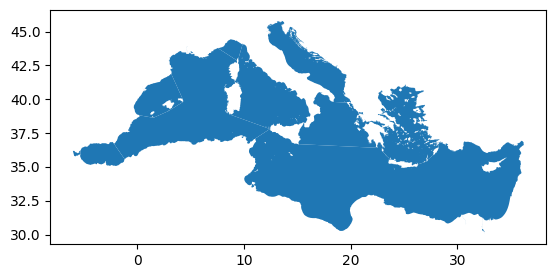

In [32]:
shape_gdf.plot()

<Axes: >

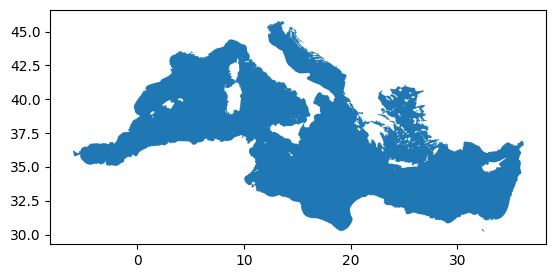

In [33]:
shape_unified_gdf_g.plot()

In [30]:
shape_unified_gdf_g = shape_unified_gdf_g.to_crs("EPSG:4326")

In [31]:
simplified_shape_unified_gdf = gpd.GeoSeries([shape_unified_gdf.simplify(0.10, preserve_topology=True)])
simplified_shape_unified_gdf = simplified_shape_unified_gdf.set_crs("EPSG:4326")

<Axes: >

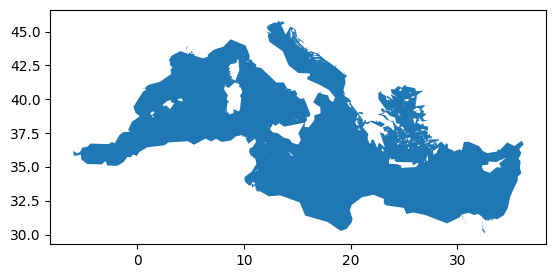

In [32]:
simplified_shape_unified_gdf.plot()

With this algorithm (found on stack exchange and appropriately modified) we are removing all the ilands that have an area smaller than a certain (tuned) threshold

In [33]:
threshold_area = 0.3  # Change this to your desired threshold

# Assuming simplified_shape_unified_gdf is your GeoPandas DataFrame
# You can access the first (and only) polygon in the DataFrame
input_polygon = simplified_shape_unified_gdf.geometry

# Initialize a list to store valid holes
valid_holes = []

# Iterate through the holes in the polygon
for hole in input_polygon.interiors[0]:
    # Calculate the area of each hole
    hole_polygon = Polygon(hole)
    hole_area = abs(hole_polygon.area)

    # If the hole's area is greater than the threshold, add it to the list of valid holes
    if hole_area >= threshold_area:
        valid_holes.append(hole)

# Create a new polygon with the major boundary and valid holes
new_polygon = Polygon(input_polygon.exterior[0], valid_holes)

# Create a GeoDataFrame with the new polygon
new_gdf = gpd.GeoDataFrame(geometry=[new_polygon])

<Axes: >

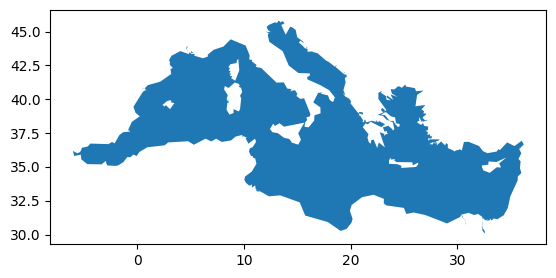

In [34]:
new_gdf = new_gdf.set_crs("EPSG:4326")
new_gdf.plot()

Afterward we will need a grid f evaluation of the smoothed fields.

In [35]:
lon_box = np.arange(-7,36,(36+7)/140)
lat_box = np.arange(30,46,(16)/70)

In [36]:
lon_mesh_cover, lat_mesh_cover = np.meshgrid(lon_box, lat_box)

In [37]:
def check_inside(LO,LA,GPD):
  point = Point(LO, LA)
  return GPD.contains(point)

In [38]:
Knots = []

We keep the knots that are inside the Mediterranean sea, leaving the remaining out.

In [39]:
for i in range(70):
  for j in range(140):
    is_inside = check_inside(lon_mesh_cover[i][j],lat_mesh_cover[i][j],new_gdf)[0]
    if(is_inside):
      Knots.append([lon_mesh_cover[i][j],lat_mesh_cover[i][j]])

In [43]:
len(Knots)

3647

# BUILDING THE PANDAS DATAFRAME

For convenience of usage (and consistency with GeoPandas), we will store and preprocess all the variables in a Pandas dataframe

Indices for the extraction building:

In [44]:
l_lon = lon_red.size
l_lat = lat_red.size

IILO = [3 * i for i in range(round(l_lon / 3))]
IILA = [3 * i for i in range(round(l_lat / 3))]

lon_lon = lon_red[IILO]
lat_lat = lat_red[IILA]

# Assuming you have already defined lon_red, lat_red, IILO, and IILA
# Calculate the Cartesian product of lon_red[IILO] and lat_red[IILA]
locations = list(itertools.product(lon_red[IILO], lat_red[IILA]))

locations_df = pd.DataFrame(locations, columns=['Longitude', 'Latitude'])

size_loc = locations_df.shape[0]
IILO_mesh, IILA_mesh = np.meshgrid(IILO, IILA)

In [45]:
locations_df.head()

,Longitude,Latitude
0,-6.958333,45.958332
1,-6.958333,45.708332
2,-6.958333,45.458332
3,-6.958333,45.208332
4,-6.958333,44.958332


Extract the data of interest. We fill the masked values with NumPy NAN

In [46]:
Data_Nasa = pd.DataFrame()

In [47]:
Long = []
Lat = []
Chlor = []
Pic = []
Poc = []
Sst = []
MM = []
IILO_list = []
IILA_list = []
Missing_02_2019 = []

In [48]:
for t in range(12):
  Long.append(locations_df['Longitude'])
  Lat.append(locations_df['Latitude'])
  MM.append([t for _ in range(size_loc)])

  CHL = np.ma.filled(list_Chlor[t],fill_value=np.nan)
  Chlor.append(CHL[IILA_mesh,IILO_mesh].flatten())

  PIC = np.ma.filled(list_Pic[t],fill_value=np.nan)
  Pic.append(PIC[IILA_mesh,IILO_mesh].flatten())

  POC = np.ma.filled(list_Poc[t],fill_value=np.nan)
  Poc.append(POC[IILA_mesh,IILO_mesh].flatten())

  SST = np.ma.filled(list_Sst[t],fill_value=np.nan)
  Sst.append(SST[IILA_mesh,IILO_mesh].flatten())

  IILO_list.append(IILO_mesh.flatten())
  IILA_list.append(IILA_mesh.flatten())

  Missing_02_2019.append(Count_NA[IILA_mesh,IILO_mesh].flatten())


In [49]:
Data_Nasa['Long'] = np.concatenate(Long)
Data_Nasa['Lat'] = np.concatenate(Lat)
Data_Nasa['Chlor'] = np.concatenate(Chlor)
Data_Nasa['Pic'] = np.concatenate(Pic)
Data_Nasa['Poc'] = np.concatenate(Poc)
Data_Nasa['Sst'] = np.concatenate(Sst)
Data_Nasa['MM'] = np.concatenate(MM)
Data_Nasa['IILO'] = np.concatenate(IILO_list)
Data_Nasa['IILA'] = np.concatenate(IILA_list)
Data_Nasa['Missing_02_2019'] = np.concatenate(Missing_02_2019)

# Missing data preprocessing

We have plenty of data available. Therfore we can just drop the data that are missing. Note that, if we miss a datum in a location for any variable, for any month, we drop the location for theremaining months. We drop also the locations that are out of the polygon we created (it may happen a consequence of the approximations made)

In [50]:
List_inside = []

for i in range(Data_Nasa.shape[0]):
  if(check_inside(Data_Nasa['Long'][i],Data_Nasa['Lat'][i],new_gdf)[0]):
    List_inside.append(True)
  else:
    List_inside.append(False)

In [51]:
Data_Nasa = Data_Nasa[List_inside] # Drop the elements that are not inside the mediterranean sea

Drop NA

In [52]:
Data_Nasa = Data_Nasa.dropna(subset=['Chlor'])
Data_Nasa = Data_Nasa.dropna(subset=['Pic'])
Data_Nasa = Data_Nasa.dropna(subset=['Poc'])
Data_Nasa = Data_Nasa.dropna(subset=['Sst'])

Data_Nasa['Chlor_log'] = np.log(Data_Nasa['Chlor'])

In [53]:
Data_Nasa.shape[0]

24299

In [54]:
# Create 'Position' column by concatenating 'Long' and 'Lat'
Data_Nasa['Position'] = Data_Nasa['Long'].astype(str) + Data_Nasa['Lat'].astype(str)

# Convert 'Position' to a categorical variable
Data_Nasa['Position'] = Data_Nasa['Position'].astype('category')
lev_out = Data_Nasa['Position'].cat.categories

# Loop through levels and remove rows where the count is not equal to 12
for i in lev_out:
    if (Data_Nasa['Position'] == i).sum() != 12:
        Data_Nasa = Data_Nasa[Data_Nasa['Position'] != i]

# Sort DataFrame by 'MM' column
Data_Nasa = Data_Nasa.sort_values(by='MM')
Data_Nasa['Position'] = Data_Nasa['Position'].astype('category')

print(Data_Nasa)

             Long        Lat     Chlor       Pic         Poc        Sst  MM  \
424     -5.458333  35.958332  1.045380  0.002622  232.000000   9.700000   0   
7016    20.291666  35.958332  0.215703  0.000018   65.199707  17.070000   0   
7015    20.291666  36.208332  0.210468  0.000016   63.399902  16.500000   0   
7014    20.291666  36.458332  0.212431  0.000012   63.799805  16.715000   0   
7013    20.291666  36.708332  0.204853  0.000014   62.199707  16.555000   0   
...           ...        ...       ...       ...         ...        ...  ..   
126324  13.291667  32.958332  0.462872  0.000032  109.000000  16.465000  11   
126323  13.291667  33.208332  0.417232  0.000016   98.600098  16.410000  11   
126322  13.291667  33.458332  0.336631  0.000016   84.799805  16.270000  11   
126452  13.791667  32.958332  0.396312  0.000018   98.399902  16.174999  11   
131687  34.291668  36.208332  0.205940  0.000348   65.399902  20.625000  11   

        IILO  IILA  Missing_02_2019  Chlor_log     

# TRAIN AND TEST DIVISION

Due to the high amount of data we will focus only on february 2019 data where the datum was observed more that 55% of the times in the month

In [55]:
Thr = 0.55

# Create a new 'TrainTest' column with 'Train' as the default value
Data_Nasa['TrainTest'] = 'Train'

# Set 'TrainTest' to 'Test' where the condition is met
Data_Nasa.loc[Data_Nasa['Missing_02_2019'] > Thr, 'TrainTest'] = 'Test'

# Calculate the percentage of 'Train' values
percentage_train = (Data_Nasa['TrainTest'] == 'Train').sum() / len(Data_Nasa)

In [56]:
percentage_train

0.4948665297741273

In [57]:
# Extract 'Test' subset
Test = Data_Nasa[Data_Nasa['TrainTest'] == 'Test'].copy()  # Create a copy to avoid modifying the original DataFrame
Test['Position'] = Test['Position'].astype('category')
Test['TrainTest'] = Test['TrainTest'].astype('category')

# Extract 'Train' subset
Train = Data_Nasa[Data_Nasa['TrainTest'] == 'Train'].copy()  # Create a copy to avoid modifying the original DataFrame
Train['Position'] = Train['Position'].astype('category')
Train['TrainTest'] = Train['TrainTest'].astype('category')

Plot of the locations available

In [58]:
locations_Train = Train.iloc[:len(Train['Position'].cat.categories), [0, 1]]

In [59]:
locations_Train

,Long,Lat
6972,20.041666,30.958334
6971,20.041666,31.208334
6967,20.041666,32.208332
6966,20.041666,32.458332
6964,20.041666,32.958332
...,...,...
28565,18.541666,40.708332
28408,17.791666,31.958334
28406,17.791666,32.458332
28320,17.541666,37.958332


<Axes: >

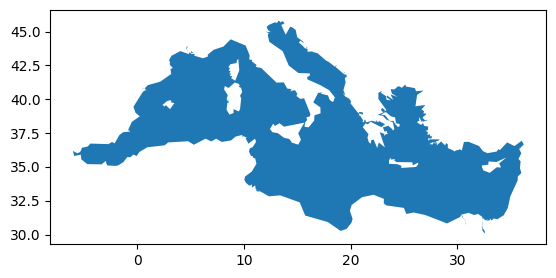

In [ ]:
new_gdf.plot()

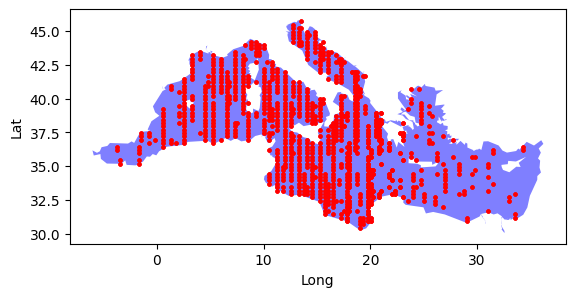

In [60]:
fig, ax = plt.subplots()

# Plot the GeoDataFrame 'new_gdf'
new_gdf.plot(ax=ax, color='blue', alpha=0.5)  # Adjust color and transparency as needed

# Extract and plot points from the 'locations' DataFrame
locations_Train.plot.scatter(x='Long', y='Lat', color='red', marker='.', ax=ax)  # Adjust color and marker as needed

# Add any additional plot customization if necessary

# Display the plot
plt.show()

# Smoothing

I scale the covariates in preparation for the smoothing

In [61]:
pip install scikit-learn

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [63]:
Train['Pic'] = scaler.fit_transform(Train[['Pic']])
Train['Poc'] = scaler.fit_transform(Train[['Poc']])
Train['Sst'] = scaler.fit_transform(Train[['Sst']])

Test['Pic'] = scaler.fit_transform(Test[['Pic']])
Test['Poc'] = scaler.fit_transform(Test[['Poc']])
Test['Sst'] = scaler.fit_transform(Test[['Sst']])

Data_Nasa['Pic'] = scaler.fit_transform(Data_Nasa[['Pic']])
Data_Nasa['Poc'] = scaler.fit_transform(Data_Nasa[['Poc']])
Data_Nasa['Sst'] = scaler.fit_transform(Data_Nasa[['Sst']])

Remark: it seemes that pygam has some conflicts with the previously loaded libraries. Therefore before running this section one should clean the environment and upload again the Data_Nasa dataframe, the new_gdf object and the train and test dataframes

In [64]:
Path_D_N = path + "/Results/Data_Nasa.csv"
Path_TR = path + "/Results/Train.csv"
Path_TE = path + "/Results/Test.csv"
Path_Med = path + "/Results/Mediterranean_Sea.shp"
Path_KN = path + "/Results/Knots.csv"

Knots = pd.DataFrame(Knots, columns=['Long', 'Lat'])

Data_Nasa.to_csv(Path_D_N, index=False)
Train.to_csv(Path_TR, index=False)
Test.to_csv(Path_TE, index=False)
Knots.to_csv(Path_KN, index=False)
new_gdf.to_file(Path_Med)

**Before running the following code you need to clean the environment completely**

Loading

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
path = "/content/gdrive/My Drive/PYTHON_project/DATA"

path_Chlor_a = path + "/Chlor_a"
path_Pic = path + "/Pic"
path_Poc = path + "/Poc"
path_Sst = path + "/Sst"
path_Days = path + "/Days"
path_Layer = path + "/Layers"

print(path_Chlor_a)
print(path_Pic)
print(path_Poc)
print(path_Sst)
print(path_Days)
print(path_Layer)

Mounted at /content/gdrive
/content/gdrive/My Drive/PYTHON_project/DATA/Chlor_a
/content/gdrive/My Drive/PYTHON_project/DATA/Pic
/content/gdrive/My Drive/PYTHON_project/DATA/Poc
/content/gdrive/My Drive/PYTHON_project/DATA/Sst
/content/gdrive/My Drive/PYTHON_project/DATA/Days
/content/gdrive/My Drive/PYTHON_project/DATA/Layers


In [2]:
Path_D_N = path + "/Results/Data_Nasa.csv"
Path_TR = path + "/Results/Train.csv"
Path_TE = path + "/Results/Test.csv"
Path_KN = path + "/Results/Knots.csv"
Path_Med = path + "/Results/Mediterranean_Sea.shp"

In [3]:
import pandas as pd
import geopandas as gpd

We import the files preprocessed in the previous part fo the notebook

In [5]:
Mediterranean_Sea = gpd.read_file(Path_Med)
Data_Nasa = pd.read_csv(Path_D_N)
Train = pd.read_csv(Path_TR)
Knots = pd.read_csv(Path_KN)
Test = pd.read_csv(Path_TE)

We restrict on February 2019 data

In [7]:
Data_Nasa = Data_Nasa[Data_Nasa['MM'] == 2]
Train = Train[Train['MM'] == 2]
Test = Test[Test['MM'] == 2]

<Axes: >

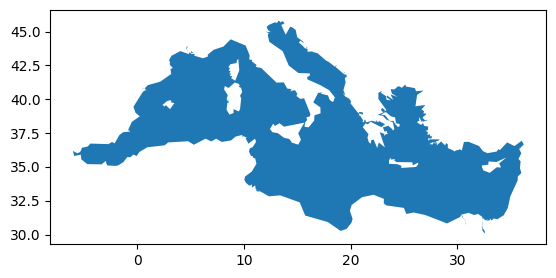

In [8]:
Mediterranean_Sea.plot()

In [9]:
pip install pygam==0.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.7 MB/s eta 0:00:00


In [10]:
from pygam import LinearGAM, s, l, te

We fit the actual GAM model. We also provide some grids for smoothing parameters lambda that control the roughness penalty effect on the likelihood of the model, so to perform gridsearch via GeneralizedCrossValidation (GCV). The output is shown in the summary

In [11]:
# Prepare the input features (X) and target variable (y)
X = Train[["Long", "Lat", "Pic", "Poc", "Sst"]].values
y = Train["Chlor_log"].values

# Create and train the GAM model
gam = LinearGAM(te(0, 1) + l(2) + l(3) + l(4)).fit(X, y)

import numpy as np

lam_small = np.logspace(-4, -3, 2)
lam_large = np.logspace(4.5, 5.5, 2)
lams = [lam_small,lam_small,lam_small,lam_large,lam_small]

gam_tuned = gam.gridsearch(X, y, lam=lams)
gam_tuned.summary()

# Make predictions
#predictions = gam.predict(X)

100% (32 of 32) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.5048
Link Function:                     IdentityLink Log Likelihood:                                 -17086.857
Number of Samples:                          964 AIC:                                            34216.7235
                                                AICc:                                           34217.7515
                                                GCV:                                                0.0248
                                                Scale:                                              0.0238
                                                Pseudo R-Squared:                                   0.8934
Feature Function                  Lam

<ipython-input-11-a64ce8b9ff4b>:15: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_tuned.summary()


For contour Plots

In [12]:
Locations_Tr = Train[["Long", "Lat"]].values

Covariates smoothing (already scaled above)

In [14]:
Pic_Tr = Train["Sst"].values
Poc_Tr = Train["Poc"].values
Sst_Tr = Train["Pic"].values

gam_Pic = LinearGAM(te(0, 1)).fit(Locations_Tr, Pic_Tr) # Pic smoothing
gam_Poc = LinearGAM(te(0, 1)).fit(Locations_Tr, Poc_Tr) # Poc smoothing
gam_Sst = LinearGAM(te(0, 1)).fit(Locations_Tr, Sst_Tr) # Sst smoothing

lam = np.logspace(-5, 5, 11)
lams = lam * 2

gam_Pic.gridsearch(Locations_Tr, Pic_Tr, lam=lams)
gam_Poc.gridsearch(Locations_Tr, Poc_Tr, lam=lams)
gam_Sst.gridsearch(Locations_Tr, Sst_Tr, lam=lams)

Pic_grid = gam_Pic.predict(Knots)
Poc_grid = gam_Poc.predict(Knots)
Sst_grid = gam_Sst.predict(Knots)

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03
100% (11 of 11) |########################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


In [15]:
Prediction_Grid = Knots
Prediction_Grid["Pic"] = Pic_grid
Prediction_Grid["Poc"] = Poc_grid
Prediction_Grid["Sst"] = Sst_grid

X_pred = Prediction_Grid[["Long", "Lat", "Pic", "Poc", "Sst"]].values
y_pred = gam.predict(X_pred)

Prediction_Set = Prediction_Grid
Prediction_Set["Chlor_log"] = y_pred
Prediction_Set["Chlor_a"] = np.exp(Prediction_Set["Chlor_log"])

In [16]:
Prediction_Set.head()

,Long,Lat,Pic,Poc,Sst,Chlor_log,Chlor_a
0,18.800000,30.457143,-0.888881,0.956421,-0.055167,-1.179702,0.307370
1,19.107143,30.457143,-0.881919,0.982153,-0.076884,-1.157363,0.314314
2,19.414286,30.457143,-0.875081,1.001591,-0.114574,-1.130479,0.322879
3,18.492857,30.685714,-0.893898,0.855503,-0.001543,-1.262528,0.282938
4,18.800000,30.685714,-0.886907,0.884863,-0.016076,-1.241648,0.288908


Contours

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

We create a geopandas dataframe with the prediction set we built up so far

In [18]:
gdf = gpd.GeoDataFrame(Prediction_Set,
                       geometry=gpd.points_from_xy(Prediction_Set.Long, Prediction_Set.Lat))

In [19]:
gdf = gpd.sjoin(gdf, Mediterranean_Sea, op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-19-bdb7d13e6267>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gdf, Mediterranean_Sea, op='within')


In [20]:
# Define the extent based on the 'Longitude' and 'Latitude' columns
min_lon, max_lon = gdf['Long'].min(), gdf['Long'].max()
min_lat, max_lat = gdf['Lat'].min(), gdf['Lat'].max()

# Create a grid of Longitudes and Latitudes
lon_grid, lat_grid = np.meshgrid(np.linspace(min_lon, max_lon, num=100),
                                 np.linspace(min_lat, max_lat, num=100))

We create the griddata that will be used to evaluate the contour and to colour the levels

In [21]:
from scipy.interpolate import griddata

grid_chlorophyll = griddata((gdf['Long'], gdf['Lat']), gdf['Chlor_a'], (lon_grid, lat_grid), method='linear')

In [22]:
grid_chlorophyll.shape

(100, 100)

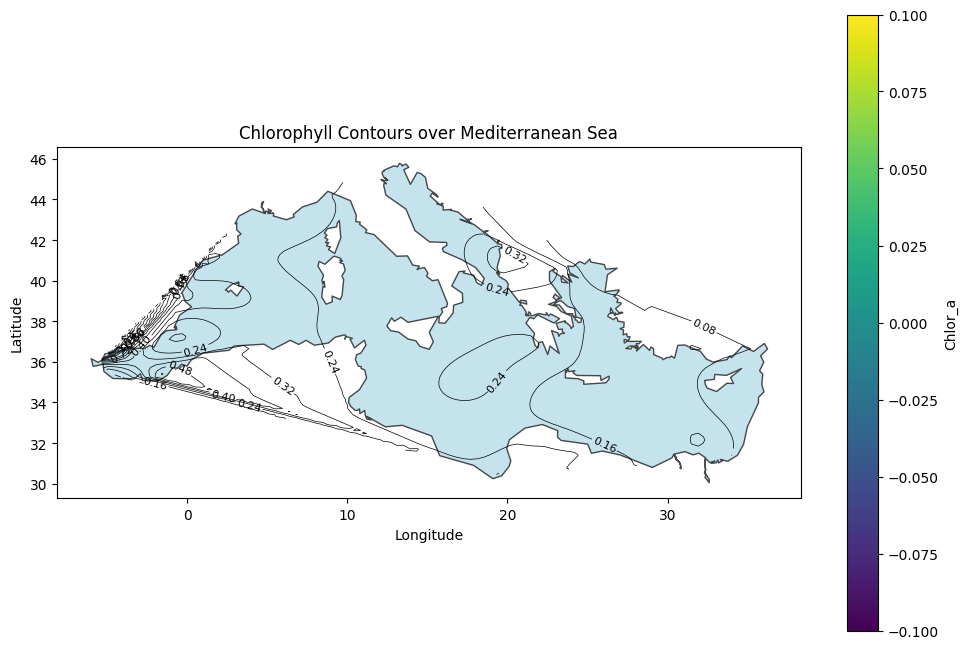

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Mediterranean Sea polygon
Mediterranean_Sea.plot(ax=ax, facecolor='lightblue', edgecolor='k', alpha=0.7)

# Overlay the Chlorophyll contours
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=grid_chlorophyll.min(), vmax=grid_chlorophyll.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

contours = plt.contour(lon_grid, lat_grid, grid_chlorophyll, levels=20, colors='k', linewidths=0.5)
plt.clabel(contours, inline=True, fontsize=8, colors='k')

# Add a colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Chlor_a')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Chlorophyll Contours over Mediterranean Sea')

plt.show()

In [24]:
from matplotlib.colors import ListedColormap

# Define a custom colormap with distinct colors for each level
custom_colors = ['blue', 'green', 'orange', 'red', 'purple']  # Add or change colors as needed
custom_cmap = ListedColormap(custom_colors)

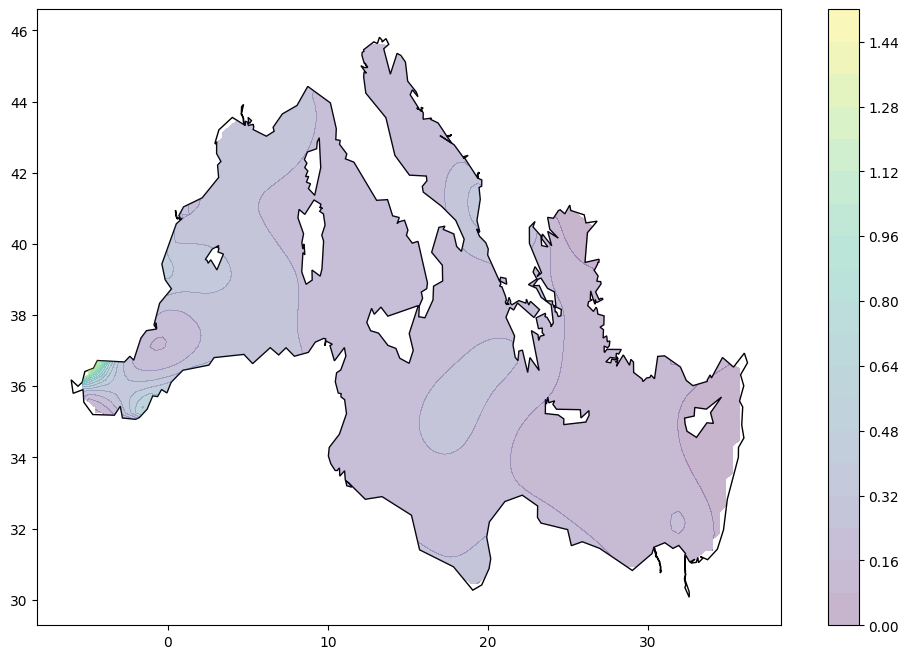

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import shapefile as shp
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots(figsize=(12, 8))

Path = mpath.Path

# Plot the Mediterranean Sea polygon
# read shape file
sfile = shp.Reader(Path_Med)

# make clip path
for shape_rec in sfile.shapeRecords():
    vertices = []
    codes = []
    pts = shape_rec.shape.points
    prt = list(shape_rec.shape.parts) + [len(pts)]
    for i in range(len(prt) - 1):
        for j in range(prt[i], prt[i+1]):
            vertices.append((pts[j][0], pts[j][1]))
        codes += [Path.MOVETO]
        codes += [Path.LINETO] * (prt[i+1] - prt[i] - 2)
        codes += [Path.CLOSEPOLY]
    clip = mpath.Path(vertices, codes)
    clip = mpatches.PathPatch(clip, facecolor='white')
    ax.add_patch(clip)  # Add the clipping path to the axes

# Mediterranean_Sea.boundary.plot(ax=ax, color='k', linewidth=1.0)

# Overlay the Chlorophyll contours
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=grid_chlorophyll.min(), vmax=grid_chlorophyll.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

contour = ax.contourf(lon_grid, lat_grid, grid_chlorophyll, levels=20, cmap=cmap, alpha=0.3)

# Set the clip path for the contour collections
for c in contour.collections:
    c.set_clip_path(clip)

plt.colorbar(contour)

#fig.savefig(pdf_name)
plt.show()